In [5]:
from data_loader import get_data_loaders
from model import get_resnet18
from train import train_model
from evaluate import evaluate_model
from grad_cam import GradCAM
from utils import save_model, load_model, predict_image



In [6]:
from utils import load_model
model = get_resnet18()
model = load_model(model, '../models/resnet18_best.pth')

c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
from evaluate import evaluate_model
evaluate_model('../models/resnet18_best.pth', '../data')

              precision    recall  f1-score   support

      glioma       0.96      1.00      0.98       144
  meningioma       1.00      0.98      0.99       144
   pituitary       1.00      0.99      1.00       144
   non-tumor       0.99      0.98      0.99       144

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



In [ ]:
import sys
sys.path.append("..")  

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Custom modules
from data_loader import get_data_loaders
from model import get_resnet18
from utils import load_model

In [15]:
DATASET_PATH = "../dataset"
BATCH_SIZE = 32

data_loaders = get_data_loaders(DATASET_PATH, batch_size=BATCH_SIZE)
print("Dataset loaded.")

Dataset loaded.


In [ ]:
MODEL_PATH = "../models/resnet18_best.pth"

model = get_resnet18(num_classes=4)
model = load_model(model, MODEL_PATH)
model.eval() 
print("Model loaded.")

c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded.


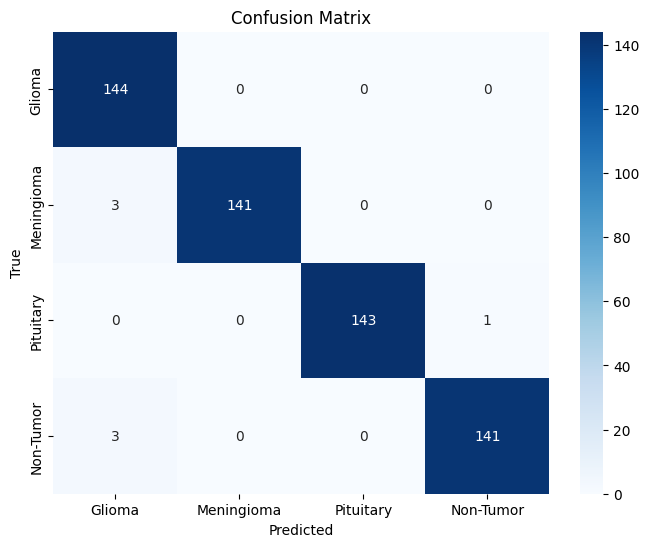

In [ ]:
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in data_loaders['test']:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.numpy())

cm = confusion_matrix(y_true, y_pred)
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'Non-Tumor']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [18]:
np.save("../models/y_true.npy", y_true)
np.save("../models/y_pred.npy", y_pred)

In [19]:
y_true = np.load("../models/y_true.npy")
y_pred = np.load("../models/y_pred.npy")

              precision    recall  f1-score   support

      Glioma       0.96      1.00      0.98       144
  Meningioma       1.00      0.98      0.99       144
   Pituitary       1.00      0.99      1.00       144
   Non-Tumor       0.99      0.98      0.99       144

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



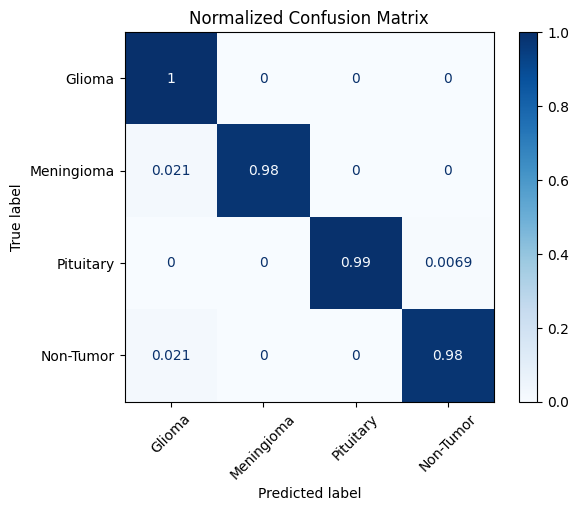

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_true, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=class_names,
                                        cmap=plt.cm.Blues, normalize='true')
plt.title("Normalized Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [22]:
from inference import predict_image

class_names = ['Glioma', 'Meningioma', 'Pituitary', 'Non-Tumor']
prediction = predict_image(model, "../dataset/test/glioma/Te-gl_0010.jpg", class_names)
print(f"Predicted tumor type: {prediction}")

Predicted tumor type: Glioma
